<a href="https://colab.research.google.com/github/eisbetterthanpi/vision/blob/main/selenium_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
# @title setup
# https://colab.research.google.com/github/kaliiiiiiiiii/Selenium-Profiles/blob/master/google-colab/selenium_profiles.ipynb

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.6

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

# install python packages
pip install google-colab-shell
pip install webdriver-manager
pip install Pyvirtualdisplay


Executing: /tmp/apt-key-gpghome.8iJvUu7Fsb/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.YNltyvLVrw/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.M8Qj6B8ceY/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
# @title service
# https://stackoverflow.com/questions/76428999/selenium-chrome-webdriver-stopped-working
# https://stackoverflow.com/questions/76409097/driver-webdriver-chrome-issues-with-a-selenium-approach-how-to-work-aro

!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service(executable_path="chromedriver")
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service, options=options)

url = "https://www.google.com/search?q=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D"
driver.get(url)  # test fingerprint
print(driver.title)


Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://deb.debian.org/debian-security buster/updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package

In [ ]:
# @title as funcs
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import requests
import math
from PIL import Image
import matplotlib.pyplot as plt

# https://maps.google.com/maps

def gmap_latlng(location):
    location = location.replace(' ','+')
    location = location+'+singapore'
    uuu = 'https://www.google.com/maps/search/?api=1&query='+location
    driver.get(uuu)
    WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, "*//button[@aria-label='Search']")))
    driver.find_elements(By.XPATH,"*//button[@aria-label='Search']")[0].click()
    # print(driver.current_url)
    # for x in range(4):
    #     time.sleep(1)
    #     driver.find_elements(By.XPATH,"*//button[@aria-label='Search']")[0].click()
    #     print(driver.current_url)
    try: WebDriverWait(driver, 3).until(lambda driver: "/data=" in driver.current_url)
    except: return
    if not '!16s' in driver.current_url: return
    olat = driver.current_url.split('!3d')[1].split('!4d')[0]
    olng = driver.current_url.split('!4d')[1].split('!16s')[0]
    return float(olat), float(olng)


def heading_url(olat, olng):
    api_key = '_'
    location = str(olat)+', '+str(olng)
    uuu='https://maps.googleapis.com/maps/api/streetview/metadata?'+'location='+location+'&key='+api_key
    response = requests.get(uuu)
    # print(response.json())
    if response.json()['status'] != 'OK': return
    lat, lng = response.json()['location'].values()
    dist = ((olat-lat)**2 + (olng-lng)**2)**(1/2)*111111
    print('dist: ',dist)
    heading = 180-math.copysign(1, olng-lng)*(90)-math.atan((olat-lat)/(olng-lng))*(180/math.pi)
    url = 'https://www.google.com/maps/@?api=1&map_action=pano&viewpoint='+str(lat)+'%2C'+str(lng)+'&heading='+str(heading)+'&pitch=5&fov=80'
    return url


def gmap_direct_old(location):
    location = location.replace(' ','+')
    location = location+'+singapore'
    uuu = 'https://www.google.com/maps/search/?api=1&query='+location
    driver.get(uuu)
    WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, "*//button[@aria-label='Search']")))
    driver.find_elements(By.XPATH,"*//button[@aria-label='Search']")[0].click()
    # if not '!16s' in driver.current_url: return
    try: WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//button[@jsaction='pane.heroHeaderImage.click']")))
    except: return
    driver.find_elements(By.XPATH,"*//button[@jsaction='pane.heroHeaderImage.click']")[0].click()

    # try: WebDriverWait(driver, 7).until(lambda driver: "/data=" in driver.current_url)
    # except: return
    # uu = driver.current_url
    # fovl = uu.find(',75y,',33)
    # pitchl = uu.find(',90t/data',fovl)
    # fov, pitch = 80, 95
    # url = uu[:fovl+1] + str(fov) + uu[fovl+3:pitchl+1] + str(pitch) + uu[pitchl+3:]
    # driver.get(url)

    WebDriverWait(driver, 7).until(EC.presence_of_element_located((By.XPATH, "*//div[@role='contentinfo']/span[7]/span/span/span")))
    element = driver.find_elements(By.XPATH,"*//div[@role='contentinfo']/span[7]/span/span/span")[0]
    mon, yyyy = element.text.split(': ')[1].split(' ')
    months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    mm = months.index(mon)+1
    date= yyyy+'-'+str(mm).zfill(2)
    # time.sleep(1)

    # WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, "*//button[contains(@jsaction, 'drawer.close')]")))
    driver.find_elements(By.XPATH,"*//button[contains(@jsaction, 'drawer.close')]")[0].click()
    # print(driver.page_source)
    WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//button[contains(@jsaction, 'drawer.open')]")))
    delist=["*//div[@id='titlecard']",
    "*//div[@id='image-header']",
    "*//div[contains(@class, 'scene-footer-container')]",
    "*//div[contains(@class, 'app-viewcard-strip')]",
    "*//div[@id='watermark']",
    "*//button[contains(@jsaction, 'drawer.open')]",]
    # time.sleep(1)
    for delete in delist:
        delement = driver.find_element(By.XPATH, delete)
        driver.execute_script("arguments[0].remove();", delement)
    element = driver.find_elements(By.XPATH,"*//div[@aria-label='Google Maps']")[0]
    # element = driver.find_elements(By.XPATH,"*//div[@id='content-container']")[0]
    # element = driver.find_elements(By.XPATH,"*//div[@class='id-scene']")[0]
    # element = driver.find_elements(By.XPATH,"*//div[@aria-label='Street View']")[0]
    # element = driver.find_elements(By.XPATH,"*//canvas[contains(@class, 'widget-scene-canvas')]")[0]
    from selenium.webdriver import ActionChains
    # ActionChains(driver).drag_and_drop_by_offset(element, 100, 0).perform()
    # https://www.selenium.dev/documentation/webdriver/actions_api/mouse/
    # element = driver.find_elements(By.XPATH,"*//div[@id='consent-bump']")[0]
    ActionChains(driver).move_to_element(driver.find_elements(By.XPATH,"*//div[@id='consent-bump']")[0]).perform()

    # print(driver.get_window_size())
    # ActionChains(driver).move_by_offset(0, -300).perform()
    # action = ActionChains(driver)
    # action.click_and_hold(element)
    # action.move_by_offset(0, 20)
    # action.release().perform()
    screenshot = element.screenshot_as_png
    return screenshot, date



def gmap_direct(location):
    location = location.replace(' ','+')
    location = location+',+Singapore'
    uuu = 'https://www.google.com/maps/search/?api=1&query='+location
    # print(uuu)
    driver.get(uuu)
    try: WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, "*//button[@id='searchbox-searchbutton']")))
    except:
        driver.find_elements(By.XPATH,"*//form[@action='https://consent.google.com/save']//button")[0].click()
        WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, "*//button[@id='searchbox-searchbutton']")))
    driver.find_elements(By.XPATH,"*//button[@id='searchbox-searchbutton']")[0].click()
    # if not '!16s' in driver.current_url: return
    try: WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, "*//button[@jsaction='pane.heroHeaderImage.click']")))
    except: return
    driver.find_elements(By.XPATH,"*//button[@jsaction='pane.heroHeaderImage.click']")[0].click()
    # print("here")
    try: WebDriverWait(driver, 5).until(lambda driver: ",90t/data=" in driver.current_url)
    except: return
    uu = driver.current_url
    # print(uu)
    fovl = uu.find(',75y,',33)
    pitchl = uu.find(',90t/data',fovl)
    fov, pitch = 80, 95
    url = uu[:fovl+1] + str(fov) + uu[fovl+3:pitchl+1] + str(pitch) + uu[pitchl+3:]
    # print(url)
    driver.get(url)

    WebDriverWait(driver, 8).until(EC.presence_of_element_located((By.XPATH, "*//div[@role='contentinfo']/span[7]/span/span/span")))
    element = driver.find_elements(By.XPATH,"*//div[@role='contentinfo']/span[7]/span/span/span")[0]
    mon, yyyy = element.text.split(': ')[1].split(' ')
    months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    mm = months.index(mon)+1
    date= yyyy+'-'+str(mm).zfill(2)

    # list of screen elements to delete
    delist=["*//div[@id='titlecard']",
    "*//div[@id='image-header']",
    "*//div[contains(@class, 'scene-footer-container')]",
    "*//div[contains(@class, 'app-viewcard-strip')]",
    "*//div[@id='watermark']",]
    # "*//button[contains(@jsaction, 'drawer.open')]",]

    try:
        # driver.find_element_by_xpath("*//button[contains(@jsaction, 'drawer.close')]")
        # print(EC.presence_of_element_located((By.XPATH, "*//button[contains(@jsaction, 'drawer.open')]")))
        # if EC.presence_of_element_located((By.XPATH, "*//button[contains(@jsaction, 'drawer.open')]")):
        driver.find_elements(By.XPATH,"*//button[contains(@jsaction, 'drawer.close')]")[0].click()
        delist.append("*//button[contains(@jsaction, 'drawer.open')]")
        WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//button[contains(@jsaction, 'drawer.open')]")))
    except: pass

    try:
        driver.find_elements(By.XPATH,"*//div[@role='alert']")[0]
        delist.append("*//div[@role='alert']")
    except: pass

    for delete in delist:
        delement = driver.find_element(By.XPATH, delete)
        driver.execute_script("arguments[0].remove();", delement)
    element = driver.find_elements(By.XPATH,"*//div[@aria-label='Google Maps']")[0]
    from selenium.webdriver import ActionChains
    # print(driver.page_source)
    ActionChains(driver).move_to_element(driver.find_elements(By.XPATH,"*//div[@id='consent-bump']")[0]).perform()
    screenshot = element.screenshot_as_png
    return screenshot, date



def get_screenshot(url):
    driver.get(url)
    WebDriverWait(driver, 7).until(EC.presence_of_element_located((By.XPATH, "*//div[@role='contentinfo']/span[7]/span/span/span")))
    element = driver.find_elements(By.XPATH,"*//div[@role='contentinfo']/span[7]/span/span/span")[0]
    mon, yyyy = element.text.split(': ')[1].split(' ')
    months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    mm = months.index(mon)+1
    date= yyyy+'-'+str(mm).zfill(2)
    delist=["*//div[@id='titlecard']",
    "*//div[@id='image-header']",
    "*//div[contains(@class, 'scene-footer-container')]",
    "*//div[contains(@class, 'app-viewcard-strip')]",
    "*//div[@id='watermark']",]
    for delete in delist:
        delement = driver.find_element(By.XPATH, delete)
        driver.execute_script("arguments[0].remove();", delement)
    element = driver.find_elements(By.XPATH,"*//div[@aria-label='Street View']")[0]
    screenshot = element.screenshot_as_png
    return screenshot, date


# 40000km, 360deg
# 40000000/360 = 1000000/9 = 111111m/deg


location = "7 THIRD ST" #
# fov : ',75y,'
# pitch: ',90t/data'
# olat, olng = gmap_latlng(location)
# print(olat, olng)

# url = heading_url(olat, olng)
# print(url)

# screenshot, date = get_screenshot(url)
# print(date)


# screenshot, date = gmap_direct(location)
# print(date)
# driver.get_screenshot_as_file("LambdaTestVisibleScreen.png")

with open('canvas.png', 'wb') as f:
    f.write(screenshot)

from PIL import Image

# # plt.imshow(np.transpose(pic_content, (1, 2, 0)))
# # image = Image.open(screenshot).convert("RGB")
# image = Image.open('canvas.png').convert("RGB")
# plt.figure(figsize=(5, 3))
# plt.axis('off')
# plt.imshow(image)
# plt.show()


In [ ]:
# @title scrape google
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import requests
import math
from PIL import Image
import matplotlib.pyplot as plt


url="https://www.google.com/search?sxsrf=AB5stBjzK4Qjah_pvMXlxkPxv3P1VZb1nQ:1688463777227&q=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D&tbm=isch&sa=X&ved=2ahUKEwiWh6Hd4fT_AhUp1jgGHb3WCAkQ0pQJegQIChAB&biw=1286&bih=876&dpr=1"
# url = "https://www.google.com/search?q=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D&tbm=isch&ved=2ahUKEwjdlP7RvPL_AhUAyKACHRdGAW4Q2-cCegQIABAA&oq=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D"
# url = "https://www.google.com/search?q=terrace+modern+design+%22properties%22+-youtube+-plan+-interior+-illustration+-news+-model+-3D&tbm=isch&safe=active&chips=q:terrace+modern+design+properties+-youtube+-plan+-interior+-illustration+-news+-model+-3d,online_chips:3bdrm+townhouse"
# url = "https://www.google.com/search?sxsrf=AB5stBiZ6cUkUivPpaWz3iSX09llLBFmqg:1688459159623&q=terrace+home+modern+design&tbm=isch&sa=X&ved=&biw=1286&bih=876&dpr=1#imgrc=o-90EBgQu5d1eM"
# url = "https://www.google.com/search?sxsrf=AB5stBiZ6cUkUivPpaWz3iSX09llLBFmqg:1688459159623&q=terrace+home+modern+design&tbm=isch&sa=X&ved=2ahUKEwjR47TD0PT_AhWCxDgGHW9AD6oQ0pQJegQICBAB&biw=1286&bih=876&dpr=1"

driver.get(url)



# scroll to the end, load everything
def scroll_end(driver):
    end = driver.find_elements(By.XPATH,'''*//div[@data-endedmessage="Looks like you've reached the end"]''')[0]#.click()
    # print(end.get_attribute("data-status")) # =5, =3 when reach end
    # while end.get_attribute("data-status") == "5":
    while end.get_attribute("data-status") != "3":
        more = driver.find_elements(By.XPATH,"*//input[@value='Show more results']")[0]#.click()
        # driver.find_elements(By.XPATH,"*//input[@value='Show more results']")[0].click()
        if more.is_displayed(): more.click()
        # height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # scroll down
    # 33sec 14s 21s
scroll_end(driver)

# # # click in each image, way too slow
# img_urls=[]
# try: WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, "*//a[@class='wXeWr islib nfEiy']")))
# except: pass
# hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']") # images
# # driver.execute_script("hits = document.getElementsByClassName('wXeWr islib nfEiy')")

# import time
# start = time.time()
# print(len(hits))
# # for i, button in enumerate(hits):
# for i, button in enumerate(hits[90:]):
#     hits[i].click()
#     # driver.execute_script("hits["+str(i)+"].click();")
#     # try: img_src = driver.find_elements(By.XPATH,"*//img[@jsname='kn3ccd']")[0].get_attribute("src")
#     # except: continue
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']")[0].get_attribute("href")
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']/img")[0].get_attribute("src")

#     WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//a[@aria-label='See more Related content']")))
#     see_mor = driver.find_elements(By.XPATH,"*//a[@aria-label='See more Related content']")[0].get_attribute("href")
#     # print(i, img_src)
#     print(i, see_mor)
#     end = time.time()
#     print(end-start)
#     start=end
#     # img_urls.append(img_src)
#     # if i>3: break
# # print(len(img_urls))



In [ ]:

def scroll_end(driver):
    end = driver.find_elements(By.XPATH,'''*//div[@data-endedmessage="Looks like you've reached the end"]''')[0]#.click()
    while end.get_attribute("data-status") != "3": # =5, =3 when reach end
        more = driver.find_elements(By.XPATH,"*//input[@value='Show more results']")[0]#.click()
        if more.is_displayed(): more.click()
        # height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # scroll down
# scroll_end(driver)



In [ ]:
hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']")
print(len(hits))
# print(len(img_urls))


787


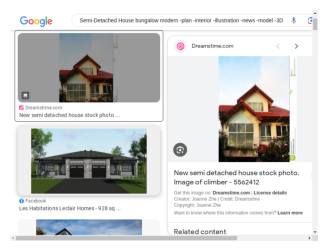

In [ ]:
# @title check driver state
# from PIL import Image
# import matplotlib.pyplot as plt
driver.get_screenshot_as_file("canvas.png")
image = Image.open('canvas.png').convert("RGB")
plt.figure(figsize=(5, 3))
plt.axis('off')
plt.imshow(image)
plt.show()

# print(driver.page_source)


In [ ]:
# click in each image, way too slow
# driver.get(url)


# img_urls=[]
# try: WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, "*//a[@class='wXeWr islib nfEiy']")))
# except: pass
hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']") # images
print(len(hits))
# hits[0].click()
import time
start = time.time()
# driver.execute_script("arguments[0].click();"
for i, button in enumerate(hits):
    hits[i].click()
    end = time.time()
    print(end-start)
    start=end
#     try: img_src = driver.find_elements(By.XPATH,"*//img[@jsname='kn3ccd']")[0].get_attribute("src")
#     except: continue
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']")[0].get_attribute("href")
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']/img")[0].get_attribute("src")
#     print(i, img_src)
#     img_urls.append(img_src)
    # if i>3: break
# print(len(img_urls))



799
0.42966341972351074
0.3534994125366211
0.7990880012512207
1.8064448833465576
0.4200780391693115
0.4924588203430176
0.42968201637268066
0.41115355491638184
0.5018532276153564
0.4600517749786377
0.4304687976837158
0.5696954727172852
0.8176999092102051
0.7004172801971436
0.7283473014831543
0.7587289810180664
0.8002912998199463
0.6970717906951904
0.7986879348754883
0.6841742992401123
0.6920926570892334
0.7753198146820068
0.7003202438354492
0.7184596061706543
1.1020288467407227
0.8295245170593262
0.8545238971710205
0.8218927383422852
0.7764291763305664
0.6404464244842529
1.270984411239624
1.2772409915924072
0.40705442428588867
0.5226197242736816
0.42069363594055176
0.43616747856140137
0.44617748260498047
0.41271233558654785
0.37732362747192383
0.37648677825927734
0.49376583099365234
0.40448427200317383
0.38515162467956543
0.45337915420532227
0.4649038314819336
0.5330498218536377
0.6075015068054199
0.44986653327941895
0.4978294372558594
0.8193995952606201
0.8188748359680176
0.94556427001

StaleElementReferenceException: ignored

In [ ]:

driver.execute_script("hits = document.getElementsByClassName('wXeWr islib nfEiy')")

print(len(hits))

import time
start = time.time()
for i, x in enumerate(hits):
# for i in range(5):
    end = time.time()
    driver.execute_script("hits["+str(i)+"].click();")
    print(i, end-start)
    start=end
# 8m50s


787
0 0.00011682510375976562
1 2.781188488006592
2 2.29365873336792
3 2.664973497390747
4 2.0612668991088867
5 1.8714542388916016
6 1.6215808391571045
7 1.7764954566955566
8 2.978672981262207
9 1.8791708946228027
10 0.5547432899475098
11 0.640042781829834
12 0.4693481922149658
13 1.1300437450408936
14 0.5936136245727539
15 0.6686937808990479
16 0.619121789932251
17 0.7672955989837646
18 0.626349687576294
19 0.6745967864990234
20 0.5984928607940674
21 0.726266622543335
22 0.6806325912475586
23 0.45371150970458984
24 0.48723673820495605
25 0.46601223945617676
26 0.4409651756286621
27 0.33374810218811035
28 0.4165210723876953
29 0.2811565399169922
30 0.35178184509277344
31 0.6461961269378662
32 0.27663731575012207
33 0.2787621021270752
34 0.31395864486694336
35 0.38855981826782227
36 0.25966405868530273
37 0.32564806938171387
38 0.3941824436187744
39 0.32682061195373535
40 0.3772249221801758
41 0.2956254482269287
42 0.3620760440826416
43 0.3594779968261719
44 0.2844066619873047
45 0.31526

In [ ]:
# driver.get(url)

pro=driver.page_source
# pro=driver.execute_script("return document.documentElement.outerHTML")

from urllib.parse import unquote
pro = unquote(pro)
# print(pro[2000000:])
pro = pro.encode().decode('unicode-escape') # try to remove \\u00
# print(pro)
print(len(pro)) # , 2617498, 2977434, 3468337
# 1389443

import re
# pattern = r"https://(?:(?!\").)*\.jpg" # start with https:// , no " , end with .jpg # https://stackoverflow.com/a/67540659/13359815
pattern = r"(?<=href=\"/imgres\?imgurl=)(?:(?!&amp;).)*(?=&amp;)" # start with href="/imgres?imgurl= , no &amp; , end with &amp; # https://stackoverflow.com/a/3926546/13359815
# pattern = r"https://(?:(?!\").)*(?=\")" # start with https:// , no " , end with " # all urls
# pattern = r"(?<=\],\[\")https://(?:(?!\").)*(?=\")" # start with ],[" then https:// , no " , end with " # all imgs? fast

# print(pro.count("imgurl"))

m = re.findall(pattern, pro)
# print(m)
print(len(m)) # 73

# for i, x in enumerate(m):
#     print(i, x)


3482470
787


<ipython-input-29-a0c00dd5fe75>:9: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


In [ ]:
import requests
for i, x in enumerate(m):
    # print(x)
    response = requests.get(x)
    print(i, response.status_code == 200)
    # print(response=200)
    # print(response.json())
    # if response.json()['status'] != 'OK': return
    # lat, lng = response.json()['location'].values()
    # if i>3: break

# response = requests.get(x)
# # print(response.json())
# print(response)


0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 False
19 True


KeyboardInterrupt: ignored

## wwwwwwwww

In [ ]:
# @title setup pandas
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_explore = pd.read_excel("/content/drive/MyDrive/explore_url.xlsx", engine='openpyxl') # urls to explore
df_home = pd.read_excel("/content/drive/MyDrive/home_urls.xlsx", engine='openpyxl') # good img urls
# display(df)
# img_seemor = [] # temp img url and seemor urls


In [ ]:
# df_all = df_all[~df_all['api date'].isnull() &(df_all['bad']!=1)]
# df_all = df_all[df_all['Latitude']=='None']
df_all = df_all[(df_all['bad']==1) & (df_all['blur']!=1)] # 3061
print(len(df_all))
# print(len(df_all[df_all['Latitude']=='None']))
# Property Address Cleaned



3061


In [ ]:
print(len(df_all[df_all['name'].isnull()]))
df_all = df_all[df_all['name'].isnull()]


In [ ]:
# import os
# os.mkdir("/content/ggmap_frombad")
# for x in range(1,7):
#     os.mkdir("/content/ggmap_frombad/0"+str(x))


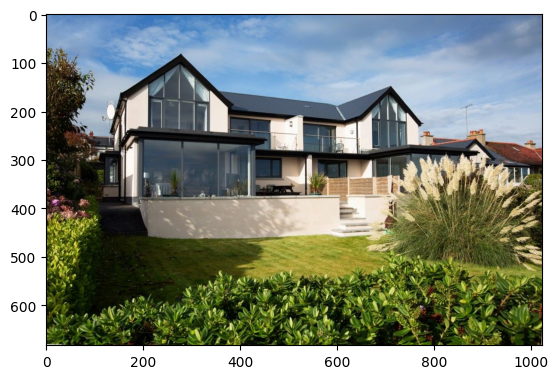

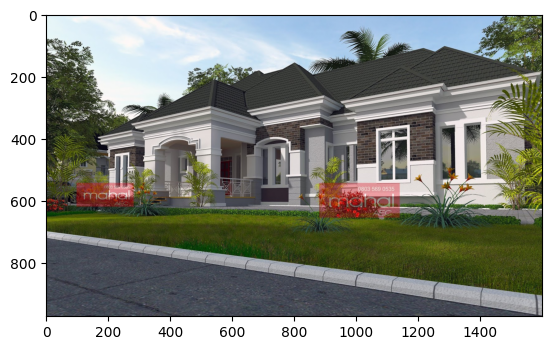

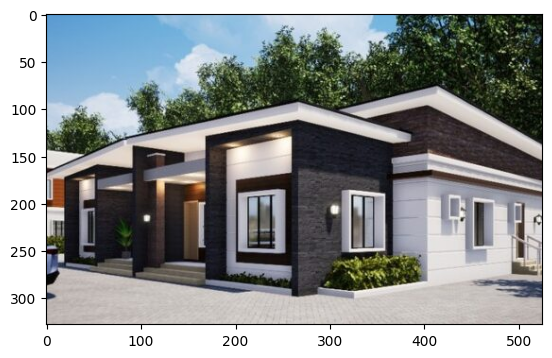

In [ ]:
# print(m)
# print(len(m))
# !pip install Pillow --upgrade
from PIL import Image
import requests
import matplotlib.pyplot as plt

for i in range(2,5):
    # print(m[i])
    response = requests.get(m[i], stream=True)
    # print(response)
    # print(response.raw)
    img = Image.open(response.raw)
    # try: img = Image.open(response.raw)
    # except: continue
    plt.imshow(img)
    plt.show()




In [ ]:
# @title setup / model
# https://colab.research.google.com/github/openai/clip/blob/master/notebooks/Interacting_with_CLIP.ipynb
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

import numpy as np
import torch
# from pkg_resources import packaging
# print("Torch version:", torch.__version__)
import clip
# clip.available_models()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model, preprocess = clip.load("ViT-B/32") # preprocess: normalize intensity using dataset mean and sd then resize and center-crop to conform to the model expects.
# model.cuda().eval()
model.to(device).eval()
input_resolution = model.visual.input_resolution # 224
context_length = model.context_length # 77
vocab_size = model.vocab_size # 49408
# print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}") # 151,277,313
# clip.tokenize("Hello World!") # case-insensitive tokenizer, padded to become 77 tokens


In [ ]:
# @title house main
import os
from PIL import Image

file_dir = '/content/ggmap_frombad'

filename_list = list(df_all['Filename'])
location_list = list(df_all['Property Address Cleaned'])


seemor_lst = [] # seemor urls

# collect see more urls
for i, button in enumerate(hits):
    hits[i].click()
    try:
        WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//a[@aria-label='See more Related content']")))
        see_mor = driver.find_elements(By.XPATH,"*//a[@aria-label='See more Related content']")[0].get_attribute("href")
    except:
        see_mor = "_"
    seemor_lst.append(see_mor)
    # print(i, img_src)

# collect img urls
import re
pattern = r"(?<=\],\[\")https://(?:(?!\").)*(?=\")" # start with ],[" then https:// , no " , end with " # all imgs? fast
m = re.findall(pattern, pro) # list img urls
# print(m)
# print(len(m)) # 73

# check if img is good


from PIL import Image
import requests
import matplotlib.pyplot as plt

images=[]
og_img=[]
# for i in range(2,5):
for i, uuu in enumerate(m):
    response = requests.get(uuu, stream=True)
    # img = Image.open(response.raw)
    try: img = Image.open(response.raw)
    except: continue
    # plt.imshow(img)
    # plt.show()
    images.append(preprocess(img))
    og_img.append(img)


texts=['a clear image of a house','an image without a house','a blurred image','a plain background']

# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
# similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

similarity = text_features @ image_features.T
print(similarity)











# @title collect
# use clip to get similarity scores for all images
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

texts=['a house','a construction site','an image of a wall','an image of trees','an image of a vehicle','a blurred image','a plain background','a plain shade of color']

text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
with torch.no_grad(): text_features = model.encode_text(text_tokens).float()
text_features /= text_features.norm(dim=-1, keepdim=True)




# img_dir = '/content/google_street_view/06'

sall=[]

t=0

# from torchvision import transforms
# image=transforms.ToTensor()(image)


        image = Image.open(img_file).convert("RGB")
        img= preprocess(image).to(device).unsqueeze(0)

        with torch.no_grad():
            image_features = model.encode_image(img).float()
        image_features /= image_features.norm(dim=-1, keepdim=True)
        similarity = text_features @ image_features.T
        # print(similarity.T)

        sall.append([img_file,similarity.squeeze()])

        # t+=1
        # if t >=5: break

# print(sall)

















# for img_file, blurrness in zip(img_file_list, blurrness_list):
# for x,filename in enumerate(left):
# for x,(location, filename) in enumerate(zip(location_list, filename_list)):
for x,(location, filename) in enumerate(zip(location_list[start:], filename_list[start:])):
# for x,(olat, olng, filename) in enumerate(zip(latitude_list[start:], longitude_list[start:], filename_list[start:])):
    # if x in [34,40,62]:
    #     continue
    print(x)

    try:
        i = df_all.index[df_all['Filename'] == filename][0]
    except: i = df_all.index[df_all['Filename'] == filename.replace('-','/').replace('_','/')][0]
    # print(i)
    # df_all.at[i, 'glat'] = olat
    # df_all.at[i, 'glng'] = olng
    df_all.at[i, 'gdate'] = date
    df_all.at[i, 'name'] = filename
    # print(loc)

    cls=filename.split('. ')[0]
    filename=filename.replace("/", "-")

    pic_dir = file_dir+'/'+cls+'/'+filename + ' ' + date + '.jpg'

    with open(pic_dir, 'wb') as pic_file:
        pic_file.write(pic_content)
    # image = Image.open(pic_dir).convert("RGB")
    # plt.figure(figsize=(5, 4))
    # plt.axis('off')
    # plt.imshow(image)
    # plt.show()

    # t+=1
    # if t >=5: break

df_all.to_excel('/content/drive/MyDrive/properties_batch.xlsx', index=False, header=False)

# No Street View imagery available here


In [ ]:
import os
# allfiles = os.listdir('/content/gmap/01/')
# print(len(allfiles))

count=0
for x in range(1,7):
    allfiles = os.listdir('/content/ggmap_frombadt/0'+str(x)+'/')
    count+=len(allfiles)
print(count)


2918


In [ ]:
print(list(df_all['Filename']))

In [ ]:
# @title zfill date

t=0
for x in range(1,7):
    img_dir = '/content/gmap_clean_/0'+str(x)
    for filename in os.listdir(img_dir):
        # print(filename)
        name = os.path.splitext(filename)[0]

        # print(name)
        date=name.split(' ')[-1]
        # print(date)
        yyyy,m=date.split('-')
        date=yyyy+'-'+m.zfill(2)
        filename1 = ' '.join(name.split(' ')[:-1])+' '+date+'.jpg'
        img_file=os.path.join(img_dir, filename)
        img_file1=os.path.join(img_dir, filename1)
        # print(img_file)
        # print(img_file1)
        os.rename(img_file, img_file1)
        # t+=1
        # if t>44: break


In [ ]:
# @title check date / sheet img file
import os
from PIL import Image
import matplotlib.pyplot as plt

img_dir = '/content/ggmap_frombad/06'

t=0
for filename in os.listdir(img_dir):
    # print(filename)
    name = os.path.splitext(filename)[0]
    img_file=os.path.join(img_dir, filename)

    # print(name)
    date=name.split(' ')[-1]
    # print(date)
    find_name = name[:-8]
    # print(find_name)

    try:
        i = df_all.index[df_all['Filename'] == find_name][0]
        # print(i)
    except:
        # print("nope")
        i = df_all.index[df_all['Filename'] == find_name.replace('-','/').replace('_','/')][0]
    # print(i)
    df_all.at[i, 'old'] = date
    # df_all.at[i, 'img file'] = filename
    df_all.at[i, 'name'] = find_name
    # t+=1
    # if t >=5: break

df_all.to_excel('/content/drive/MyDrive/properties_batch.xlsx', index=False, header=False)




In [ ]:
# display(df_all.head())
df_all

## from clean

In [ ]:
# @title data
from torchvision import datasets#, transforms

# dir='/content/google_street_view'
dir='/content/gsv70k'

# # data = datasets.ImageFolder(dir, transform=transform)
data = datasets.ImageFolder(dir, transform=None)
torch.manual_seed(0)


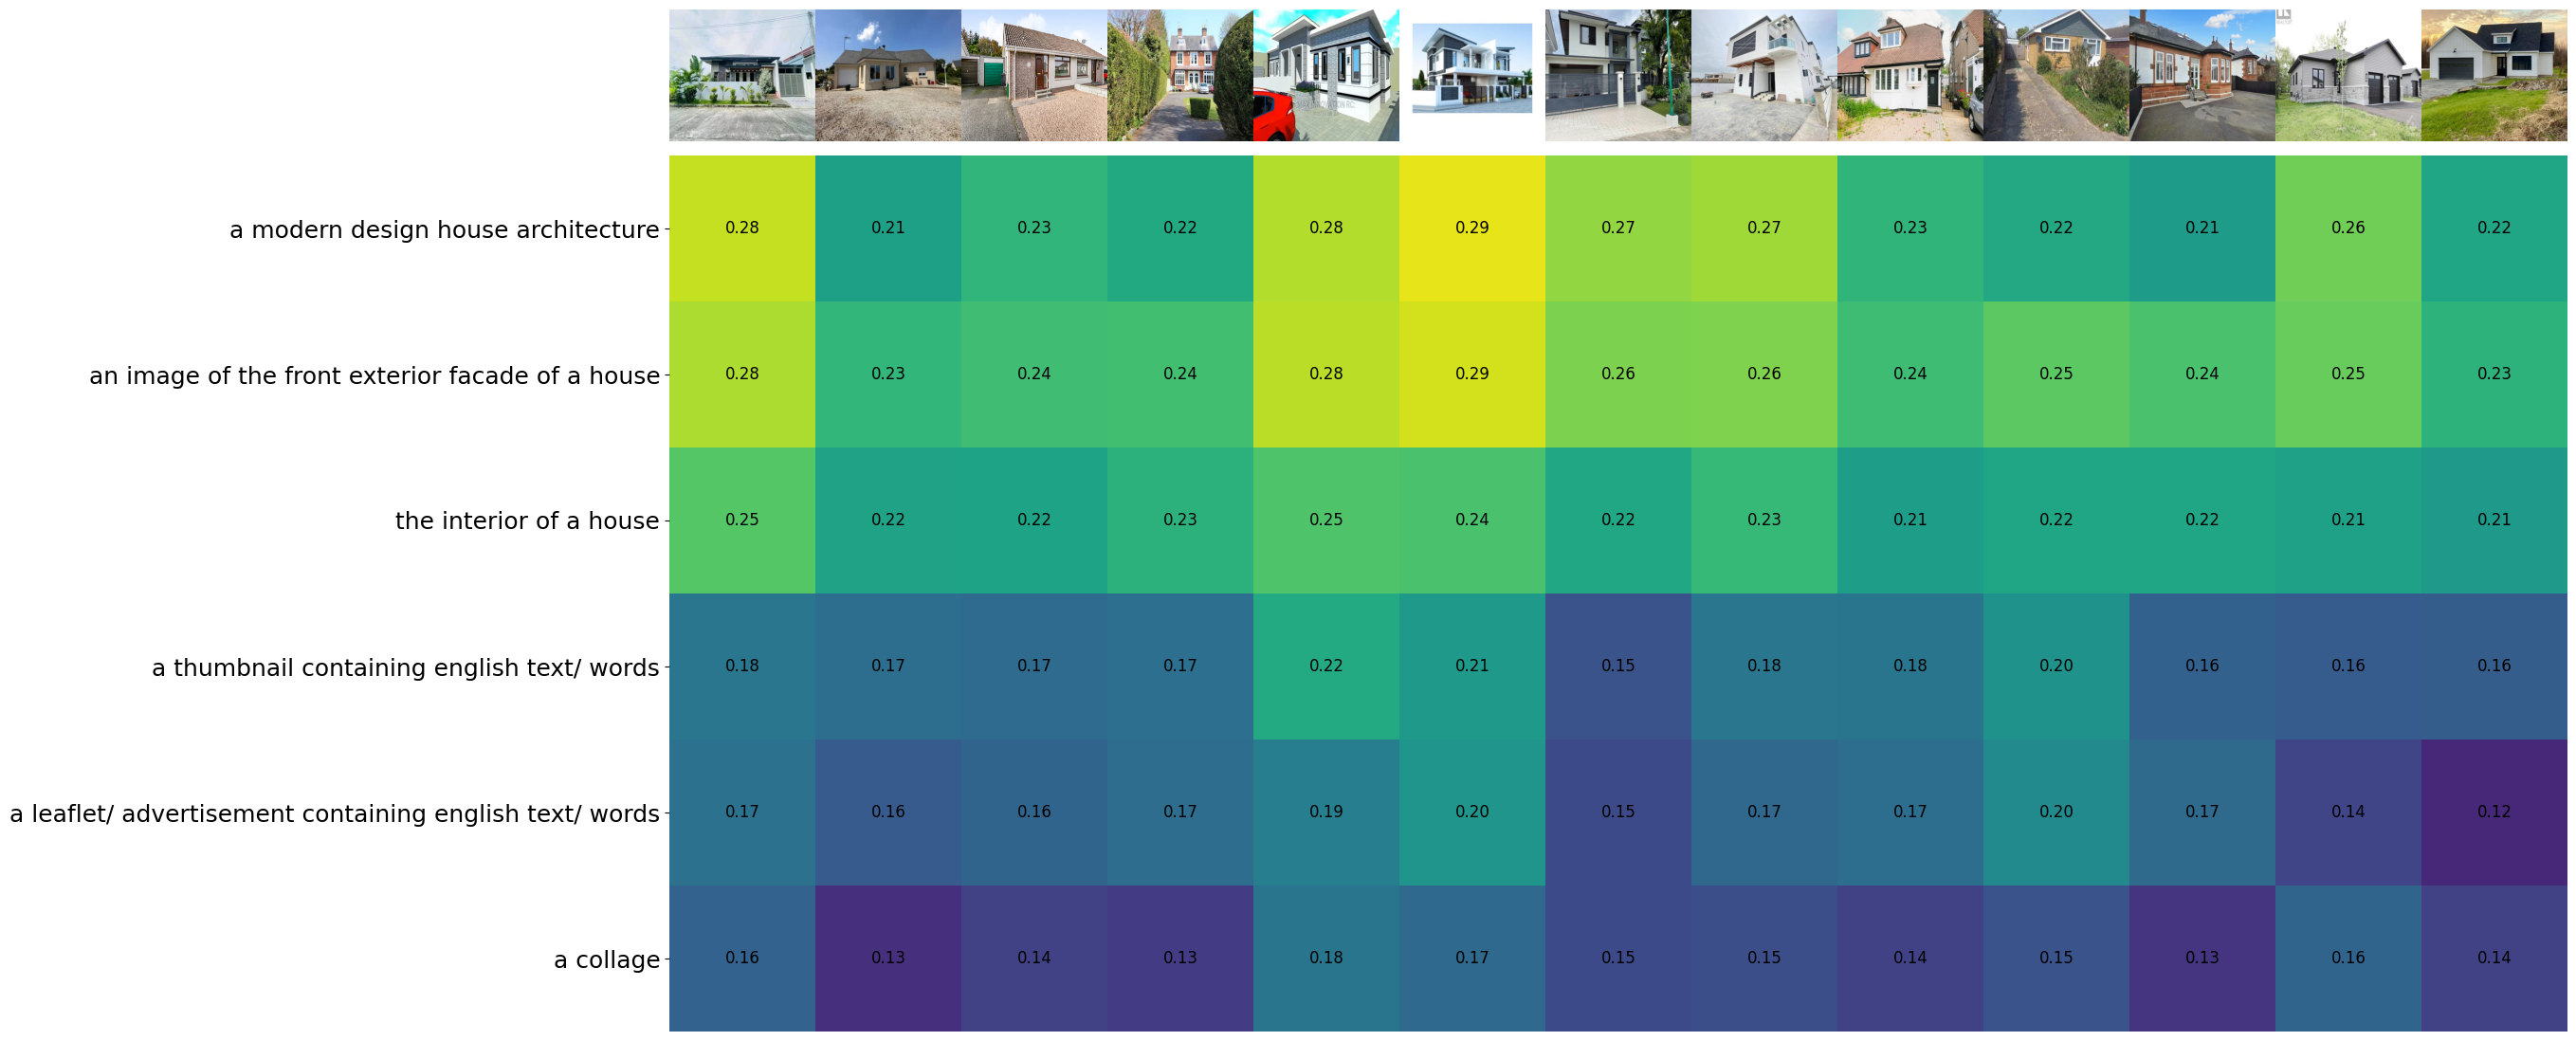

In [ ]:
# @title test texts
images=[]
og_img=[]


# [76,]

c=90
for i in range(c,c+15):
    # response = requests.get(m[i], stream=True)
    try: response = requests.get(m[i], stream=True)
    except: continue
    # img = Image.open(response.raw)
    try: img = Image.open(response.raw)
    except: continue
    images.append(preprocess(img))
    og_img.append(img)

# texts=['an image of the exterior facade of a modern house','an image of the exterior facade of a house','the interior of a house','an image with text words','a collage']
texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']

# housing facade, house front

# interior of a
# facade of a modern house
# text/ words



# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
# text_tokens = clip.tokenize(texts).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
# print(similarity)

count = len(texts)

import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 14))
plt.figure(figsize=(30, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(og_img):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, len(og_img) - 0.5])
# plt.ylim([count + 0.5, -2])
plt.ylim([count - 0.5, -1.5]) # bottom, top margin
plt.show()
# plt.title("Cosine similarity between text and image features", size=20)


In [ ]:
# @title base get similarity

images=[]
og_img=[]

c=110
for i in range(c,c+10):
    img,label=data[i]
    images.append(preprocess(img))
    og_img.append(img)

texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']


# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)


with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
# similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

similarity = text_features @ image_features.T
print(similarity)

# blur 0.23



In [ ]:
# @title collect
# use clip to get similarity scores for all images
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']

text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
with torch.no_grad(): text_features = model.encode_text(text_tokens).float()
text_features /= text_features.norm(dim=-1, keepdim=True)

sall=[]
# for i, uuu in enumerate(m[:5]):
for i, uuu in enumerate(m):


from time import sleep
def delayed_square(x):
    sleep(1)
    return x*x

data = list(range(8))
batch_size

from concurrent.futures import ThreadPoolExecutor
start = time()
e = ThreadPoolExecutor(batch_size) # 1.004sec
result = e.map(get_img, m[i*batch_size, (i+1)*batch_size])


future = [e.submit(get_img, i) for i in data]
results = [f.result() for f in future]

def get_img(uuu):
    try:
        response = requests.get(uuu, stream=True)
        image = Image.open(response.raw)
        return image
    except: return



    try: response = requests.get(uuu, stream=True)
    except: continue
    try: image = Image.open(response.raw)
    except: continue
    # plt.imshow(image)
    # plt.show()
    img= preprocess(image).to(device).unsqueeze(0)
    with torch.no_grad():
        image_features = model.encode_image(img).float()
    image_features /= image_features.norm(dim=-1, keepdim=True)
    similarity = text_features @ image_features.T
    # print(similarity.squeeze())
    sall.append([i,similarity.squeeze()])


# print(sall)



In [ ]:
# @title
import torchvision
from torchvision import transforms


great, good, interior, word, collage, left = [],[],[],[],[],[]
great_s, good_s, interior_s, word_s, collage_s, left_s = [],[],[],[],[],[]

texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']

length = len(sall[0])

t=0
for i, similarity in sall:
    modern = similarity[0]
    house = similarity[1]
    inter = similarity[2]
    text = similarity[3]
    ad = similarity[4]
    colge = similarity[5]

    print(i, similarity)
    # great, good, interior, word, collage, left

    if inter>=0.27:
        interior.append(i)
        interior_s.append(similarity)
    elif text>=0.20 or ad>=0.20:
        word.append(i)
        word_s.append(similarity)
    # elif colge>=0.22:
    #     collage.append(i)
    #     collage_s.append(similarity)

    # elif house<0.23 or (length-2)*house-similarity[2:].sum()<0.01 or house-iter<0.01 or house-text<0.01 or house-ad<0.01 or house-colge<0.01:
    elif house<0.23 or (length-2)*house-similarity[2:].sum()<0.01:# or house-iter<0.01 or house-text<0.01 or house-ad<0.01 or house-colge<0.01:
        left.append(i)
        # print((length-2)*house-similarity[2:].sum())
        left_s.append((length-2)*house-similarity[2:].sum())
        # left_s.append(similarity)
    elif modern>=0.27: # great
        great.append(i)
        great_s.append(similarity)
    else: # good
        good.append(i)
        good_s.append(similarity)
    # print(similarity[1:].sum()-similarity[0])
    # t+=1
    # if t >=5: break


# great, good, interior, word, collage, left

print("sall",len(sall))
print("great",len(great))
print("good",len(good))
print("interior",len(interior))
print("word",len(word))
print("collage",len(collage))
print("left",len(left))

c=0
# imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))
# imshow(torchvision.utils.make_grid(file2img(wall),nrow=8))
# imshow(torchvision.utils.make_grid(file2img(obscured),nrow=6))
# imshow(torchvision.utils.make_grid(file2img(blurred),nrow=5))
# imshow(torchvision.utils.make_grid(file2img(missing),nrow=5))




0 tensor([0.2744, 0.3159, 0.2695, 0.2160, 0.1967, 0.1833], device='cuda:0')
2 tensor([0.2772, 0.2675, 0.2511, 0.1870, 0.1780, 0.1551], device='cuda:0')
3 tensor([0.2721, 0.2785, 0.2237, 0.1686, 0.1677, 0.1617], device='cuda:0')
4 tensor([0.2985, 0.2827, 0.2446, 0.1793, 0.1642, 0.1782], device='cuda:0')
5 tensor([0.2500, 0.2883, 0.2357, 0.2033, 0.2014, 0.1663], device='cuda:0')
6 tensor([0.2558, 0.2463, 0.2331, 0.1789, 0.1665, 0.1324], device='cuda:0')
7 tensor([0.2636, 0.2644, 0.2278, 0.1760, 0.1743, 0.1537], device='cuda:0')
8 tensor([0.2917, 0.2946, 0.2643, 0.2008, 0.1992, 0.1929], device='cuda:0')
9 tensor([0.2776, 0.2406, 0.2187, 0.1768, 0.1634, 0.1903], device='cuda:0')
10 tensor([0.2661, 0.2558, 0.2203, 0.1686, 0.1718, 0.1556], device='cuda:0')
11 tensor([0.2627, 0.2614, 0.2346, 0.1765, 0.1783, 0.1401], device='cuda:0')
12 tensor([0.2346, 0.2571, 0.2304, 0.1959, 0.1973, 0.1674], device='cuda:0')
13 tensor([0.2784, 0.2838, 0.2245, 0.1842, 0.1776, 0.1683], device='cuda:0')
14 tenso

In [ ]:
# @title display imgs

import matplotlib.pyplot as plt

plt.axis('off')


def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    # plt.figure(figsize = (20,15))
    plt.figure(figsize=(30, 14))
    # plt.figure(figsize = (16,5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def file2img(img_files):
    imgs=[]
    for img_file in img_files:
        image = Image.open(img_file).convert("RGB")
        image=transforms.ToTensor()(image)
        imgs.append(image)
    return imgs

c=0

# display a grid of the images in each category, make sure images are collated correctly
# careful not to display too many images, else ram will explode

# imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))

imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))
# imshow(torchvision.utils.make_grid(file2img(wall[c:c+64]),nrow=8))
# imshow(torchvision.utils.make_grid(file2img(obscured[c:c+64]),nrow=8))
# imshow(torchvision.utils.make_grid(file2img(obscured[c:]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(blurred[c:64]),nrow=6))
# imshow(torchvision.utils.make_grid(file2img(missing[c:]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(left[c:c+100]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(left[c:c+64])))


In [ ]:
print(obscured[c:c+64])


['/content/gsv70k/01/01. 20 BUTTERFLY AVE 2022-03.jpg', '/content/gsv70k/01/01. 9 JLN LABU AYER 2019-05.jpg', '/content/gsv70k/01/01. 7 LUCKY CRES 2022-09.jpg', '/content/gsv70k/01/01. 1A GUILLEMARD RD 2022-04.jpg', '/content/gsv70k/01/01. 102 JLN KURAS 2019-08.jpg', '/content/gsv70k/01/01. 38 PEACH GDN 2022-10.jpg', '/content/gsv70k/01/01. 30 JLN ASAS 2022-11.jpg', '/content/gsv70k/01/01. 17 ELITE TER 2022-09.jpg', '/content/gsv70k/01/01. 8 HAIG AVE 2022-05.jpg', '/content/gsv70k/01/01. 22 LIMAU GDN 2022-09.jpg', '/content/gsv70k/01/01. 92A GUILLEMARD RD 2022-09.jpg', '/content/gsv70k/01/01. 94 BRANKSOME RD 2022-03.jpg', '/content/gsv70k/01/01. 4 FIDELIO ST 2023-01.jpg', '/content/gsv70k/01/01. 132 MARSHALL RD 2022-10.jpg', '/content/gsv70k/01/01. 54 LICHI AVE 2018-03.jpg', '/content/gsv70k/01/01. 17 NAROOMA RD 2022-09.jpg', '/content/gsv70k/01/01. 22A BRIGHTON AVE 2019-04.jpg', '/content/gsv70k/01/01. 24 ROBERTS LN 2022-10.jpg', '/content/gsv70k/01/01. 442 MACPHERSON RD 2022-03.jpg',

In [ ]:
for i,x in enumerate(left_s):
    print(i, x.item())

In [ ]:
# @title count imgs
# count num of imgs in each class
tt=0
for x in range(1,7):
    allfiles = os.listdir('/content/gsv70kg/0'+str(x))
    # allfiles = os.listdir('/content/gmap_clean/0'+str(x))
    # allfiles = os.listdir('/content/ggmap/0'+str(x))
    # allfiles = os.listdir('/content/ggmap_frombad/0'+str(x))
    print(x, len(allfiles))
    tt+=len(allfiles)
print("tt",tt)

1 14717
2 8540
3 19817
4 14812
5 9559
6 493
tt 67938


In [ ]:
# @title make new folders
import os
for x in range(1,7):
    fol = '/content/ggmap/0'+str(x)
    if not os.path.exists(fol):
        os.makedirs(fol)

In [ ]:
# @title move files
import os
import shutil

# allfiles = os.listdir(source)
# for f in allfiles:
#     src_path = os.path.join(source, f)
#     dst_path = os.path.join(destination, f)
#     shutil.copyfile(src_path, dst_path)


c=0
source = '/content/gmap_clean/'
destination = '/content/gsv70k_clip/'
for x in range(1,7):
    allfiles = os.listdir(source+'0'+str(x))
    # # for src_path in good:
    for f in allfiles:
        # f=src_path.split('/')[-1]

        src_path = source+f[:2]+'/' +f
        dst_path = destination+f[:2]+'/' +f
        # print(src_path, dst_path)
        shutil.copyfile(src_path, dst_path)
        # c+=1
        # if c>5: break




In [ ]:
# @title resize imgs
# gmap: 1024,648 ; api: 640, 400
from PIL import Image
import os

c=0
for x in range(1,7):
    fol = '/content/gmap/0'+str(x)
    gfol = '/content/ggmap/0'+str(x)
    files=os.listdir(fol)
    for file in files:
        # print(file)
        im = Image.open(fol+'/'+file)
        width, height = im.size
        # print(width, height)
        im = im.resize((640, 400))
        im = im.convert('RGB')
        im.save(gfol+'/'+file)
        # print(fol+'/'+file)
        # print(gfol+'/'+file)
        # c+=1
        # if c>5: break


##save

In [ ]:
!ls -a /content/ggmap_frombad
# !rm -R /content/gsv/.ipynb_checkpoints
# %cd /content
!ls

# sometimes random .ipynb_checkpoints files gets placed in the folders, delete them before zipping
!rm -R /content/ggmap_frombad/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/01/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/02/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/03/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/04/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/05/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/06/.ipynb_checkpoints

!zip -r /content/drive/MyDrive/ggmap_frombad3.zip /content/ggmap_frombad


In [ ]:
!unzip /content/drive/MyDrive/ggmap_frombad3.zip -d /


In [ ]:
# !rm -R /content/ggmap_frombad

# @title move files
import os
import shutil

# allfiles = os.listdir(source)
# for f in allfiles:
#     src_path = os.path.join(source, f)
#     dst_path = os.path.join(destination, f)
#     shutil.copyfile(src_path, dst_path)

source = '/content/ggmap_frombad/06/06/'
destination = '/content/ggmap_frombad/06'
c=0

for filename in os.listdir(source):
# for src_path in good:
    src_path = os.path.join(source, filename)
    # f=src_path.split('/')[-1]
    # print('/'.split(name))
    # print(destination, f)
    dst_path = os.path.join(destination, filename)
    # print(filename)
    # print(src_path)
    # print(dst_path)
    # shutil.copyfile(src_path, dst_path)
    shutil.move(src_path, dst_path)
    # print(src_path, dst_path)
    # c+=1
    # if c>5: break





In [ ]:
#@title Quit driver
driver.quit()
display.stop_display()